# 규제가 있는 선형회귀 - 릿지, 라쏘, 엘라스틱넷 회귀

#### 규제가 있는 모델 구축 - 당뇨병 데이터세트
#### 1. 데이터 전처리
#### 2. Ridge, Lasso, Elasticnet regression 구축: 회귀 계수 확인, 하이퍼 파라미터 탐색
#### 3. 교차 검증으로 최적의 하이퍼파라미터 탐색: LassoCV()

In [5]:
# 관련 라이브러리 및 모듈 Import
import numpy as np
import pandas as pd

In [11]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# 0. 데이터 수집, 탐색, 준비

In [12]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

diab = load_diabetes()
diab.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

####  데이터셋에 대한 설명 및 정보 확인

In [13]:
# 데이터셋 정보확인
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### 데이터프레임 변환

In [14]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [15]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# diab_df생성
# diab_df.head() 데이터 5개 확인

diab_df = pd.DataFrame(data=diab.data, columns=diab.feature_names)
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [16]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [17]:
# 과학적 표기법을 숫자형으로 변환 (e^(-4) 이렇게 나오는거 소수점으로 변환)
pd.options.display.float_format = '{:.5f}'.format
np.set_printoptions(precision=2,suppress=True)

In [18]:
diab_df['progress'] = diab.target
diab_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progress
0,0.03808,0.05068,0.06170,0.02187,-0.04422,-0.03482,-0.04340,-0.00259,0.01991,-0.01765,151.00000
1,-0.00188,-0.04464,-0.05147,-0.02633,-0.00845,-0.01916,0.07441,-0.03949,-0.06833,-0.09220,75.00000
2,0.08530,0.05068,0.04445,-0.00567,-0.04560,-0.03419,-0.03236,-0.00259,0.00286,-0.02593,141.00000
3,-0.08906,-0.04464,-0.01160,-0.03666,0.01219,0.02499,-0.03604,0.03431,0.02269,-0.00936,206.00000
4,0.00538,-0.04464,-0.03638,0.02187,0.00393,0.01560,0.00814,-0.00259,-0.03199,-0.04664,135.00000
...,...,...,...,...,...,...,...,...,...,...,...
437,0.04171,0.05068,0.01966,0.05974,-0.00570,-0.00257,-0.02867,-0.00259,0.03119,0.00721,178.00000
438,-0.00551,0.05068,-0.01591,-0.06764,0.04934,0.07917,-0.02867,0.03431,-0.01811,0.04449,104.00000
439,0.04171,0.05068,-0.01591,0.01729,-0.03734,-0.01384,-0.02499,-0.01108,-0.04688,0.01549,132.00000
440,-0.04547,-0.04464,0.03906,0.00122,0.01632,0.01528,-0.02867,0.02656,0.04453,-0.02593,220.00000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


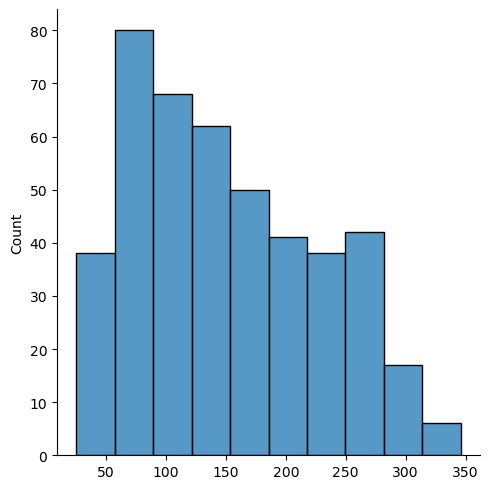

In [19]:
# target 분포 확인
import seaborn as sns
sns.displot(diab.target)

In [20]:
# 누락치 확인,  data type 확인 ->  isnull().sum(), target에 결측값이 있으면 해당 관측치 제거
diab_df.isnull().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
progress    0
dtype: int64

In [21]:
# X(독립변수), Y(종속변수) 분할
X= diab.data
y= diab.target

In [22]:
# 학습용, 평가용 데이터 분리
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state=42)

# 모델별 계수변화, 알파별 계수 비교 데이터프레임(comp_df)

In [23]:
#각 모델별 계수로 이루어진 데이터프레임 준비
comp_df = pd.DataFrame(index=diab.feature_names + ["R2 score"])
comp_df

""
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


In [ ]:
#각 모델별, 규제강도별 평가지표 저장


# 1. 규제가 없는 선형모델

In [ ]:
#모델 구축 및 학습
model_LR = 

#모델 평가


# 회귀 계수 확인


- 계수값 시각화

In [ ]:



# 시각화
coef = np.abs(LR_coef)

In [ ]:
# 모델별 비교 데이터프레임 열 추가


# 1. 릿지 모델

In [ ]:
# 릿지 선형회귀 모델 평가: model_Ridge1, alpha=1

# a=1일때 회귀 계수 확인


In [ ]:
# 선형 모델 평가


#a = 1 릿지 모델 회귀 계수


- 계수값 시각화

In [ ]:


# 시각화


In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우



# 2. 라쏘 모델

In [ ]:


# alpha = 1


In [ ]:
# 라쏘 선형회귀 모델 평가(alpha=1)
# 선형 모델 평가


#a = 1 라쏘 모델 회귀 계수



- 계수 시각화

In [ ]:

# 시각화


In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우


# 3. 엘라스틱넷 모델

In [ ]:


# 모델 구축 및 학습(alpha=1, l1_ratio=0.5)


In [ ]:
#모델 평가 및 회귀 계수 확인
# 엘라스틱넷 선형회귀 모델 평가(alpha=1, L1_ratio=0.5)
# 선형 모델 평가


#a = 1 엘라스틱넷 모델 회귀 계수


- 계수 시각화

In [ ]:


# 시각화


In [ ]:
# alpha_list=[0.01, 1, 10, 100]인 경우, l1_ratio=0.5 



### LassoCV() : k-폴드 교차 검증으로 최적의 Lasso 모델 하이퍼파라미터 alpha 찾기

In [ ]:
#LassoCV()에 필요한 매개변수 설정
#0.01 ~ 9.91 까지 alpha_list  생성


- 모델 학습

## [응용] 보스턴 주택가격 데이터를 활용하여, 규제가 없을때, 리지, 라쏘, 엘라스틱넷 선형회귀를 수행하고 각각의 회귀계수 및 예측 성능을 비교하라
테스트 사이즈:0.3
random_state=42
